In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
import statsmodels.api as sm
import pandas as pd



In [2]:
# Random example: hours studied vs marks
np.random.seed(42)
X = np.random.randint(1, 10, size=(20, 1))       # independent variable (hours)
y = 2 * X.flatten() + 5 + np.random.randn(20)*2  # dependent variable (marks) with some noise

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
model = LinearRegression()
model.fit(X_train, y_train)

# Best-fit line slope and intercept
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)


Slope (m): 2.067855609627288
Intercept (c): 4.2547489181510105


R Squared


In [11]:
print(model.score(X_test , y_test)*100)
print(model.score(X_train , y_train)*100)

71.2377454055657
82.10599758598262


In [8]:
# Training predictions
y_train_pred = model.predict(X_train)


r2_train = r2_score(y_train, y_train_pred)
print("Training R²:", r2_train)

# Test predictions
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("Test R²:", r2_test)


Training R²: 0.8210599758598263
Test R²: 0.7123774540556571


In [12]:
# Interpretation

# Training R² high

# Model ne training data ke variation ka 82% explain kiya

# Matlab line points ke pass hai aur LSM ne kaam sahi kiya ✅

# Test R² thoda kam

# Model ne unseen points ke variation ka 71% explain kiya

# Ye normal hai, kyunki unseen data me noise ya different pattern ho sakta hai

# Agar difference bohot bada hota → overfitting ka sign

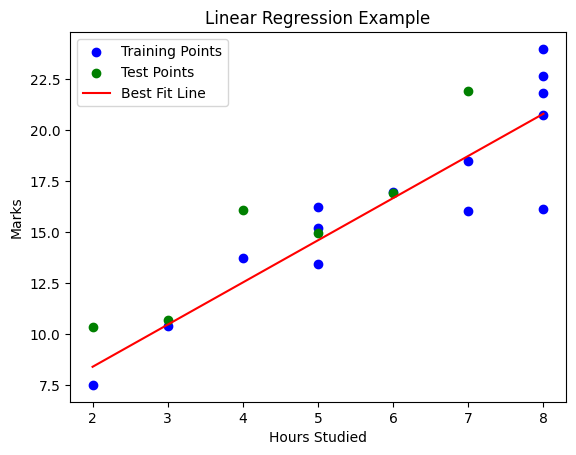

In [5]:
plt.scatter(X_train, y_train, color='blue', label='Training Points')
plt.scatter(X_test, y_test, color='green', label='Test Points')

# Best-fit line
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='red', label='Best Fit Line')

plt.xlabel("Hours Studied")
plt.ylabel("Marks")
plt.title("Linear Regression Example")
plt.legend()
plt.show()


P-values

In [17]:
# 1. Statsmodels mein intercept (constant) khud add karna parta hai
# Ye step zaroori hai warna results sahi nahi ayenge
X_train_with_constant = sm.add_constant(X_train)

# 2. Ordinary Least Squares (OLS) model fit karein
model_stat = sm.OLS(y_train, X_train_with_constant).fit()

# 3. P-values aur poori summary dekhein
print(model_stat.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     55.06
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           8.05e-06
Time:                        18:30:51   Log-Likelihood:                -28.821
No. Observations:                  14   AIC:                             61.64
Df Residuals:                      12   BIC:                             62.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2547      1.759      2.418      0.0

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)
